# Title: Default payments of Credit Cards<br>

**By:** Bhavya Balasubramanya <br><br>
**Data:** This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. We would be using it to predict if the payment is likely to default the next month<br><br>
**Source:** This is originally UCI data but we are downloading from Kaggle.<br><br>
**Link:** https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset. 

## Attributes <br>

There are 25 variables:<br><br>

ID: ID of each client.<br>
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit.<br>
SEX: Gender (1=male, 2=female).<br>
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown).<br>
MARRIAGE: Marital status (1=married, 2=single, 3=others).<br>
AGE: Age in years.<br>
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above).<br>
PAY_2: Repayment status in August, 2005 (scale same as above).<br>
PAY_3: Repayment status in July, 2005 (scale same as above).<br>
PAY_4: Repayment status in June, 2005 (scale same as above).<br>
PAY_5: Repayment status in May, 2005 (scale same as above).<br>
PAY_6: Repayment status in April, 2005 (scale same as above).<br>
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar).<br>
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar).<br>
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar).<br>
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar).<br>
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar).<br>
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar).<br>
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar).<br>
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar).<br>
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar).<br>
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar).<br>
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar).<br>
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar).<br>
default.payment.next.month: Default payment (1=yes, 0=no).

In [1]:
##Importing all the necessary packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

palette = sns.husl_palette(9, s=0.7 )
import warnings
# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)
%matplotlib inline

In [2]:
#Loading data
df = pd.read_csv('UCI_Credit_Card.csv')

In [3]:
#Lets take a look at data
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.rename(columns={'default.payment.next.month':'Default'}, inplace=True)
df.drop(columns='ID',inplace=True)

In [5]:
#Any nulls? None, we are good
df.isnull().any().sum()

0

In [6]:
#Lets check the statistics of our data
df.dtypes

LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
Default        int64
dtype: object

In [7]:
#Looking into continuous data
df.describe(include=[np.float])

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [8]:
#Looking into categorical data
df.describe(exclude=[np.float])

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,0.221200
std,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,0.415062
min,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000
25%,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000


## Exploratory Data Analysis

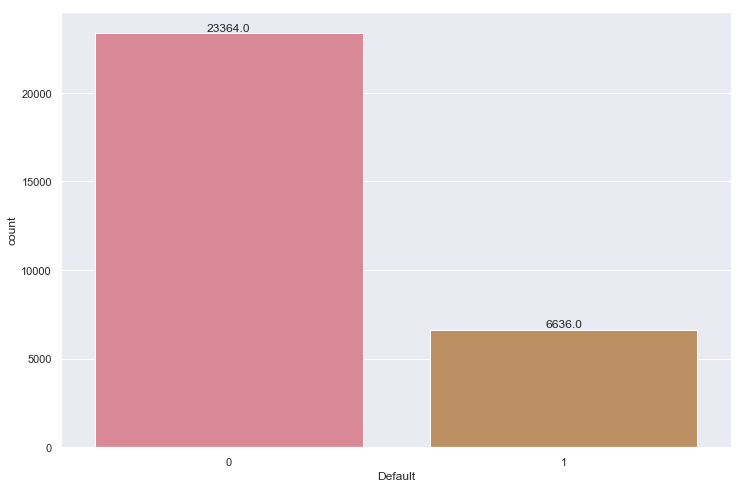

In [9]:
#Lets see how our data looks.
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
palette = sns.husl_palette(9, s=0.7 )
ax = sns.countplot(x='Default',data=df, palette = palette)
for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{}'.format(y), (x.mean(), y), ha='center', va='bottom')

#Looks like data is imbalanced but we are going to balance it out while modeling

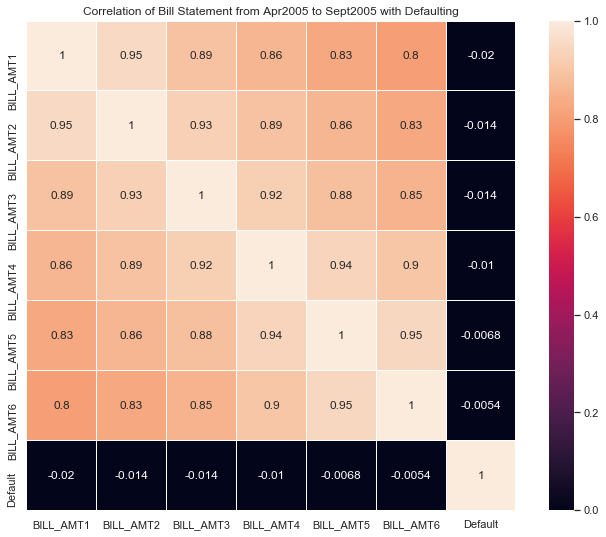

In [10]:
#Lets try to segment the columns and try to see how they are related.
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
bill = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','Default']

plt.title('Correlation of Bill Statement from Apr2005 to Sept2005 with Defaulting')
corrmat = df[bill].corr()
corrmat.index = bill
sns.heatmap(corrmat,annot=True,xticklabels=corrmat.columns,yticklabels=corrmat.columns,linewidths=.1,vmin =0,vmax=1, square=True)
plt.show()

#Looks like the bills are extremely correlated with each other and almost not related to target. 


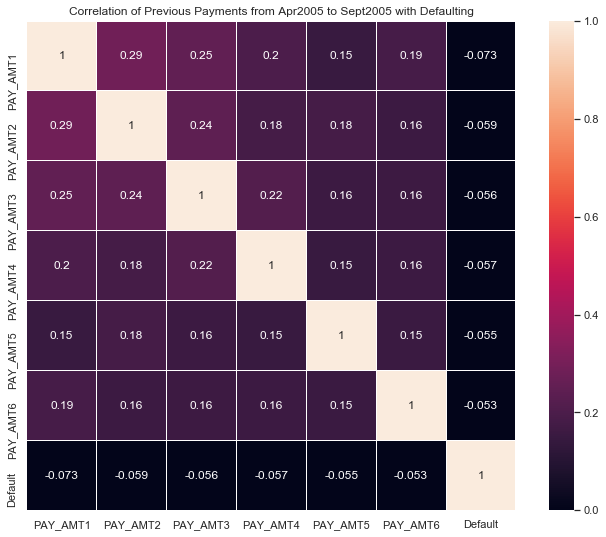

In [11]:
#Lets see how the payment amounts are correlated with each other and the target
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
amt = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','Default']

plt.title('Correlation of Previous Payments from Apr2005 to Sept2005 with Defaulting')
corrmat1 = df[amt].corr()
corrmat1.index = amt
sns.heatmap(corrmat1,annot=True,xticklabels=corrmat1.columns,yticklabels=corrmat1.columns,linewidths=.1,vmin =0,vmax=1, square=True)
plt.show()

#We can see that no only are they weekly related, they are also weakly related to the target itself

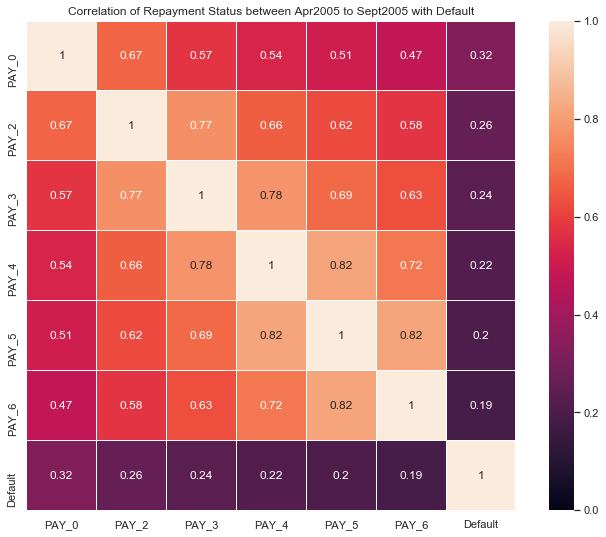

In [12]:
#Let's now see the correlations between pay items and with the target
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
pay = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','Default']

plt.title('Correlation of Repayment Status between Apr2005 to Sept2005 with Default')
corrmat2 = df[pay].corr()
corrmat2.index = pay
sns.heatmap(corrmat2,annot=True,xticklabels=corrmat2.columns,yticklabels=corrmat2.columns,linewidths=.1,vmin =0,vmax=1, square=True)
plt.show()

#They are strongly correlated with each other and weekly with target

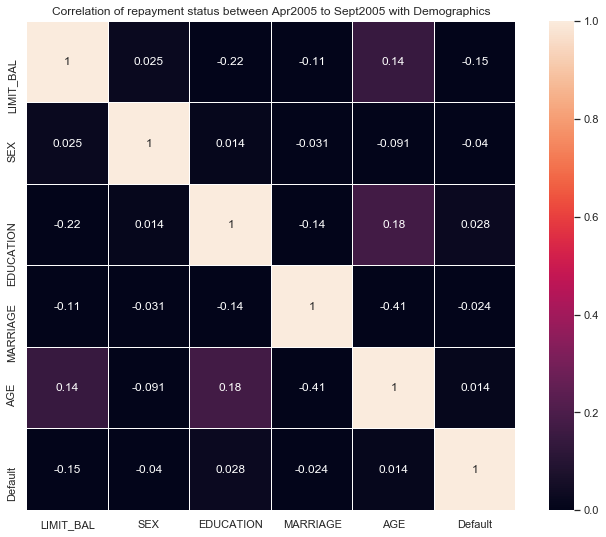

In [13]:

#Lets now see the correlation between all other attibutes and target
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
clas = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','Default']

plt.title('Correlation of repayment status between Apr2005 to Sept2005 with Demographics')
corrmat3 = df[clas].corr()
corrmat3.index = clas
sns.heatmap(corrmat3,annot=True,xticklabels=corrmat3.columns,yticklabels=corrmat3.columns,linewidths=.1,vmin =0,vmax=1, square=True)
plt.show()

#Other attributes are very weakly correlated with each other and the target

c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


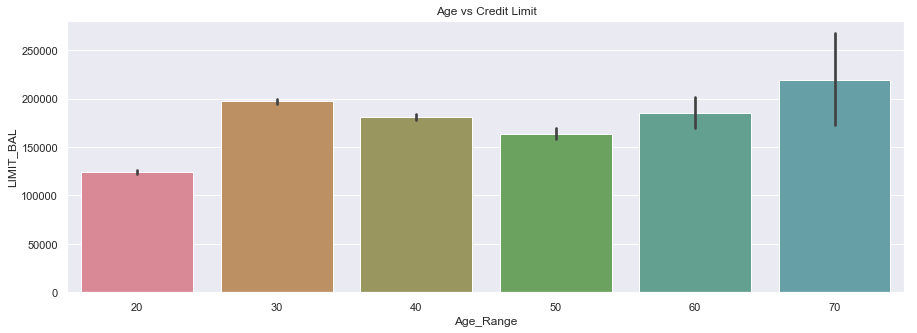

In [14]:
#Let us see the relationship between Age and credit limit

sns.set(style="darkgrid")
plt.figure(figsize=(15, 5))

#Function that groups age into a range
def set_age(row):
    if (row['AGE'] >= 17 and row['AGE'] <= 29):
       return 20
    elif (row['AGE'] >= 30 and row['AGE'] < 40):
       return 30
    elif (row['AGE'] >= 40 and row['AGE'] < 50):
       return 40
    elif (row['AGE'] >= 50 and row['AGE'] < 60):
       return 50
    elif (row['AGE'] >= 60 and row['AGE'] < 70):
       return 60
    elif (row['AGE'] >= 70 and row['AGE'] < 80):
       return 70
    elif (row['AGE'] >= 80 and row['AGE'] < 90):
       return 80
    else:
       return 90

#Adding temporary column for Age range.
dat = df.assign(Age_Range=df.apply(set_age, axis=1))
ax = sns.barplot(x="Age_Range",y="LIMIT_BAL",data=dat,palette = palette)
plt.title("Age vs Credit Limit")

plt.show()



Looks like people in 20s get less credit and people in 30s and 70s get higher limits

c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


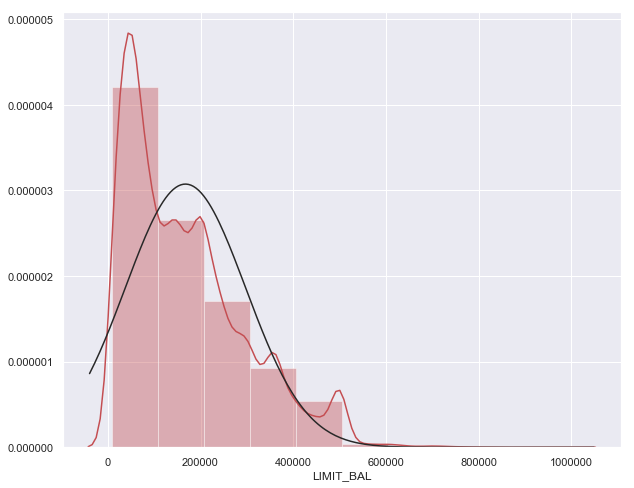

In [15]:
sns.set(style="darkgrid")
import scipy.stats as stats
plt.figure(figsize=(10, 8))
sns.distplot(df.LIMIT_BAL, bins = 10, fit = stats.norm,color='r');

Above distribution shows that majority of our limit is between 0 to 100000. 

In [16]:
df.LIMIT_BAL.value_counts().head(10)

50000.0     3365
20000.0     1976
30000.0     1610
80000.0     1567
200000.0    1528
150000.0    1110
100000.0    1048
180000.0     995
360000.0     881
60000.0      825
Name: LIMIT_BAL, dtype: int64

We can see that we were right to assume that most of the people had credit limit within 100,000.

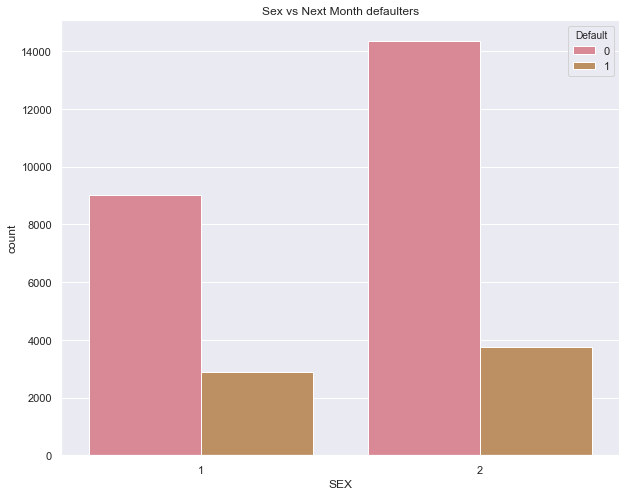

Number of females in DataSet:  18112
Number of females not to default next month:  14349
Number of females to default next month:  3763
Ratio of female not to default next month:  0.7922371908127208
Ratio of female to default next month:  0.20776280918727916
Number of males in DataSet:  11888
Number of males not to default next month:  9015
Number of males to default next month:  2873
Ratio of male not to default next month:  0.7583277254374159
Ratio of male to default next month:  0.2416722745625841


In [17]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 8))
y = sns.countplot(x=df['SEX'],hue=df['Default'], palette=palette)
y.set_title("Sex vs Next Month defaulters")
plt.show()

print("Number of females in DataSet: ",len(df[df.SEX == 2]))
print("Number of females not to default next month: ",len(df[(df.SEX == 2) & (df.Default == 0)]))
print("Number of females to default next month: ",len(df[(df.SEX == 2) & (df.Default == 1)]))
print("Ratio of female not to default next month: ",len(df[(df.SEX == 2) & (df.Default == 0)])/len(df[df.SEX == 2]))
print("Ratio of female to default next month: ",len(df[(df.SEX == 2) & (df.Default == 1)])/len(df[df.SEX == 2]))
print("Number of males in DataSet: ",len(df[df.SEX == 1]))
print("Number of males not to default next month: ",len(df[(df.SEX == 1) & (df.Default == 0)]))
print("Number of males to default next month: ",len(df[(df.SEX == 1) & (df.Default == 1)]))
print("Ratio of male not to default next month: ",len(df[(df.SEX == 1) & (df.Default == 0)])/len(df[df.SEX == 1]))
print("Ratio of male to default next month: ",len(df[(df.SEX == 1) & (df.Default == 1)])/len(df[df.SEX == 1]))

We can see that 21% of female will default payment as opposed to 24% of men.

(0.5, 6.5)

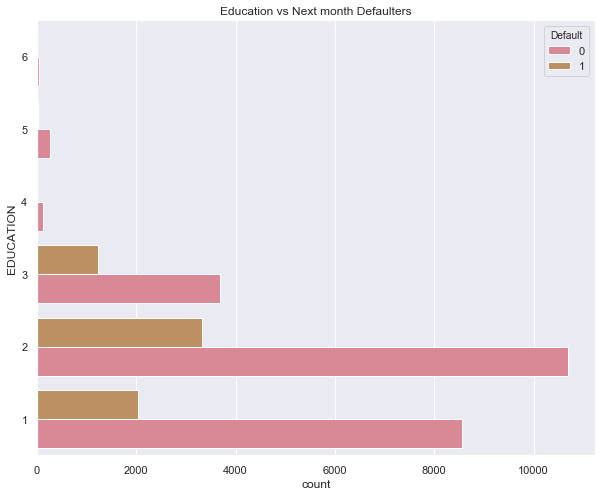

In [18]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 8))

pal = sns.color_palette("Paired")
x = sns.countplot(y=df['EDUCATION'],hue=df['Default'], palette=palette)
x.set_title("Education vs Next month Defaulters")
plt.ylim(0.5,6.5)

Above graph shows us that University Educated people are more likely to default than Graduates or High School Educated people.

c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


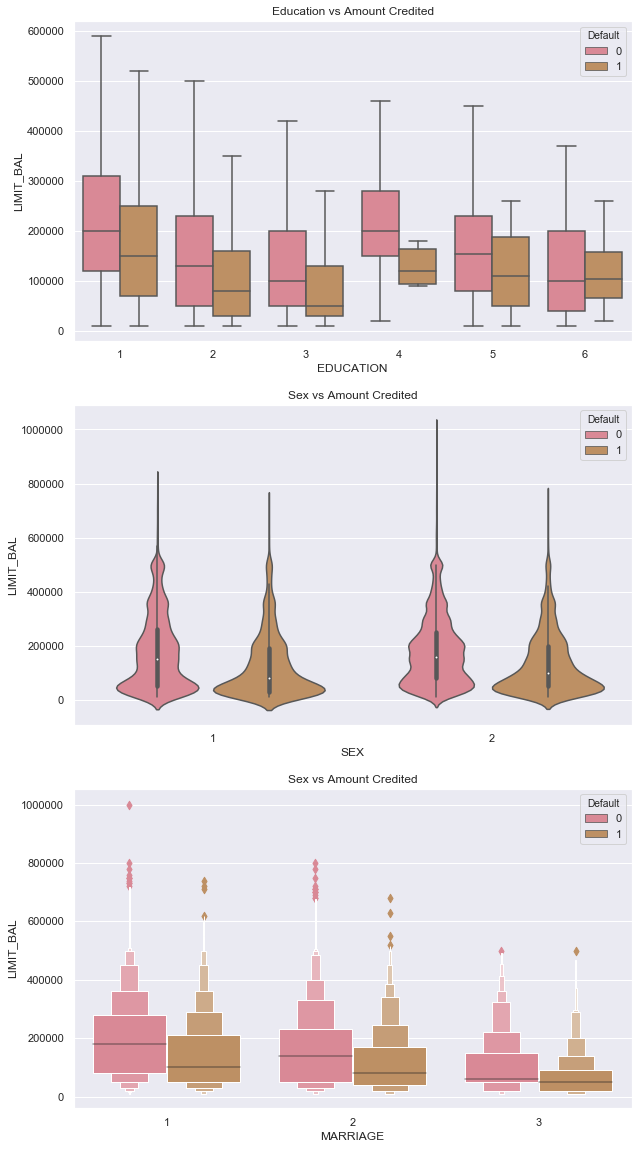

In [19]:
#Marital status vs relationship for the two income classes
sns.set(style="darkgrid")
plt.figure(figsize=(10, 20))

plt.subplot(3,1,1)

sns.boxplot(x="EDUCATION", y="LIMIT_BAL", hue="Default", data=df, palette=palette,showfliers=False)
plt.xlim(0.5,6.5)
plt.title("Education vs Amount Credited")


plt.subplot(3,1,2)
sns.violinplot(x="SEX", y="LIMIT_BAL", hue="Default", data=df, palette=palette, showfliers=False)
plt.title("Sex vs Amount Credited")


plt.subplot(3,1,3)
sns.boxenplot(x="MARRIAGE", y="LIMIT_BAL", hue="Default", data=df, palette=palette)
plt.title("Sex vs Amount Credited")
plt.xlim(0.5,3.5)

plt.show()

The first plot shows that Graduates get more credits than Unitversity and High school educated people. Also, we can see that women have credit limit between 50k to 225k overall and for men it is between 25k to almost 230k. In terms of marrital status, married people are likely to default more than unmarried and others. 

## Supervized Modelling Techniques. 

Let us try to use various models to predict our target, defaults for the next month and try to see  how accurate we are and what is our error rates.

#### Balancing data - Undersampling

In [20]:
#Before we try our models, let us try to balance our data.
#Trying undersampling as amount of data is is not very less.

#taking count of rows that are defaulters
dflt = len(df[df.Default == 1])

#Taking number of Non default indicies
nodfltidx = df[df.Default == 0].index

#taking 6636 rows by indices randomly
random_indices = np.random.choice(nodfltidx, dflt, replace=False)

#take indies of default data
dfltidx = df[df.Default == 1].index

#take a combination of 6636 default and 6636 non default data
idx = np.concatenate([dfltidx,random_indices])

data = df.loc[idx]

In [21]:
data.shape

(13272, 24)

### 1. Naive Bayes Modelling

#### a. With training and test data

In [22]:
#Identify the predictors and target

X = data.drop(columns = 'Default')
y = data.Default
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [23]:
#Use Bernoulli's Naive Bayes model
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()
# Fit our model to the data.
bnb.fit(X_train, y_train)
# Classify, storing the result in a new variable.
y_test = bnb.predict(X_test)
Naive_Bayes_data = bnb.score(X_train,y_train)
print("Naive Bayes Score for training set : {}".format(Naive_Bayes_data))
print("Naive Bayes Score for test set : {}".format(bnb.score(X_test,y_test)))


Naive Bayes Score for training set : 0.6806811332127788
Naive Bayes Score for test set : 1.0


              precision    recall  f1-score   support

  No Default       0.49      0.59      0.53      3264
     Default       0.50      0.39      0.44      3372

   micro avg       0.49      0.49      0.49      6636
   macro avg       0.49      0.49      0.49      6636
weighted avg       0.49      0.49      0.49      6636



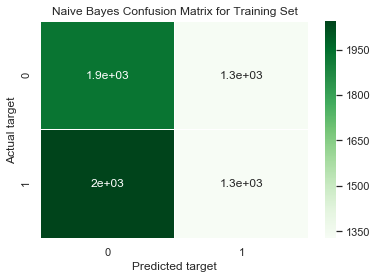

Average accuracy of Naive Bayes using cross validation for training data: 0.68 (+/- 0.02)
Root mean squared error of Naive Bayes model using PCA on Payment Indicator : 0.7134715070134703


In [24]:
print(classification_report(y_train, y_test.round(), target_names=['No Default', 'Default']))
confmat1 = confusion_matrix(y_train, y_test.round())

#creating heatmap of confusion matrix
plt.figure(figsize = (6,4))
sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'w', 'axes.grid': False, 'axes.linewidth': 1 })
sns.heatmap(confmat1,
           cmap='Greens',
           annot=True,
           linewidths=0.5)
plt.title('Naive Bayes Confusion Matrix for Training Set')
plt.xlabel('Predicted target')
plt.ylabel('Actual target')
plt.show()

NaiveBayes_RMSE_data = np.sqrt(metrics.mean_squared_error(y_test,y_train))
NaiveBayes_data_train = cross_val_score(bnb, X_train, y_train, cv=5)
print("Average accuracy of Naive Bayes using cross validation for training data: %0.2f (+/- %0.2f)" % (NaiveBayes_data_train.mean(), NaiveBayes_data_train.std() * 2))
print("Root mean squared error of Naive Bayes model using PCA on Payment Indicator : {}".format(NaiveBayes_RMSE_data))

We can see the above confusion matrix and calculate Sensitivity as 38% and Specificity as 61%. This means that while we are good at predicting the Non defaults for next month, we are not good at identifying defaults.

### 2. KNN Model

#### a. Weighted model using Scaling and PCA with Test and Training data

In [25]:
scaler = StandardScaler()
s = scaler.fit(X).transform(X)
pca = PCA()
pcax = pca.fit_transform(s)

c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [26]:
x_train, x_test, y_train, y_test = train_test_split(pcax, y, test_size=0.5, random_state=0)

In [27]:
knn = neighbors.KNeighborsRegressor(n_neighbors=5 ,weights = 'distance')
knn.fit(x_train, y_train)
y_test = knn.predict(x_test)

In [28]:
print("Accuracy score for training data : {}".format(knn.score(x_train,y_train)))
print("Accuracy score for test data : {}".format(knn.score(x_test,y_test)))


Accuracy score for training data : 0.9987941350917591
Accuracy score for test data : 1.0


              precision    recall  f1-score   support

  No Default       0.49      0.51      0.50      3264
     Default       0.50      0.48      0.49      3372

   micro avg       0.50      0.50      0.50      6636
   macro avg       0.50      0.50      0.50      6636
weighted avg       0.50      0.50      0.50      6636



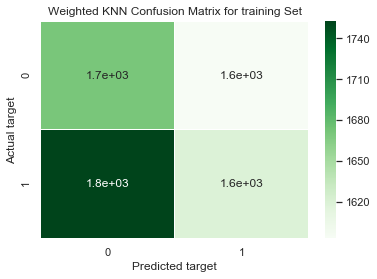

Weighted average accuracy of KNN model using cross validation for training data: 0.08 (+/- 0.06)
Root mean squared error of weighted KNN model using PCA on Payment Indicator : 0.5980301303627501


In [29]:
print(classification_report(y_train, y_test.round(), target_names=['No Default', 'Default']))
confmat2 = confusion_matrix(y_train, y_test.round())

#creating heatmap of confusion matrix
plt.figure(figsize = (6,4))
sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'w', 'axes.grid': False, 'axes.linewidth': 1 })
sns.heatmap(confmat2,
           cmap='Greens',
           annot=True,
           linewidths=0.5)
plt.title('Weighted KNN Confusion Matrix for training Set')
plt.xlabel('Predicted target')
plt.ylabel('Actual target')
plt.show()

KNNw_RMSE_data = np.sqrt(metrics.mean_squared_error(y_test,y_train))
KNN_Weighted_data_train = cross_val_score(knn, x_train, y_train, cv=5)
print("Weighted average accuracy of KNN model using cross validation for training data: %0.2f (+/- %0.2f)" % (KNN_Weighted_data_train.mean(), KNN_Weighted_data_train.std() * 2))
print("Root mean squared error of weighted KNN model using PCA on Payment Indicator : {}".format(KNNw_RMSE_data))

#### b. Weighted model with PCA on Payment Indicator

In [30]:
predictor = data[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
target = data.Default
pcapay = PCA(n_components = 2)
pred_pay_ind = pcapay.fit_transform(predictor)
knn.fit(pred_pay_ind, target)
pred_y = knn.predict(pred_pay_ind)
print("Accuracy score of KNN using PCA on payment indicator : {}".format(knn.score(pred_pay_ind, target)))

Accuracy score of KNN using PCA on payment indicator : 0.10896724934699598


              precision    recall  f1-score   support

  No Default       0.66      0.84      0.74      6636
     Default       0.78      0.56      0.65      6636

   micro avg       0.70      0.70      0.70     13272
   macro avg       0.72      0.70      0.69     13272
weighted avg       0.72      0.70      0.69     13272



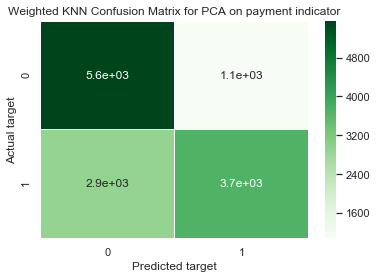

Weighted average accuracy using cross validation KNN for PCA on payment indicator: 0.01 (+/- 0.03)
Root mean squared error of weighted KNN model using PCA on payment indicator : 0.47197265563086493


In [31]:
print(classification_report(target, pred_y.round(), target_names=['No Default', 'Default']))
confmat3 = confusion_matrix(target, pred_y.round())

#creating heatmap of confusion matrix
plt.figure(figsize = (6,4))
sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'w', 'axes.grid': False, 'axes.linewidth': 1 })
sns.heatmap(confmat3,
           cmap='Greens',
           annot=True,
           linewidths=0.5)
plt.title('Weighted KNN Confusion Matrix for PCA on payment indicator')
plt.xlabel('Predicted target')
plt.ylabel('Actual target')
plt.show()

KNNw_RMSE_pay_ind = np.sqrt(metrics.mean_squared_error(pred_y,target))
KNN_Weighted_pay_ind = cross_val_score(knn,pred_pay_ind, target, cv=5)
print("Weighted average accuracy using cross validation KNN for PCA on payment indicator: %0.2f (+/- %0.2f)" % (KNN_Weighted_pay_ind.mean(), KNN_Weighted_pay_ind.std() * 2))
print("Root mean squared error of weighted KNN model using PCA on payment indicator : {}".format(KNNw_RMSE_pay_ind))

#### c. Weighted model with PCA on Payment Amounts

In [32]:
amount = data[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
pcaamt = PCA(n_components = 2)
pred_pay_amt = pcaamt.fit_transform(amount)
knn.fit(pred_pay_amt, target)
y_pred = knn.predict(pred_pay_amt)
print("Accuracy score of KNN using PCA on payment amount : {}".format(knn.score(pred_pay_amt, target)))

Accuracy score of KNN using PCA on payment amount : 0.9140415913200723


              precision    recall  f1-score   support

  No Default       0.92      0.99      0.95      6636
     Default       0.99      0.91      0.95      6636

   micro avg       0.95      0.95      0.95     13272
   macro avg       0.96      0.95      0.95     13272
weighted avg       0.96      0.95      0.95     13272



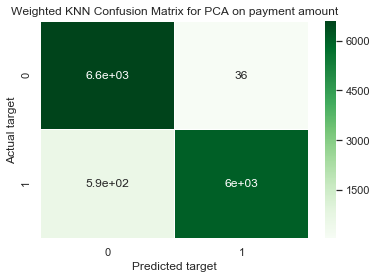

Weighted average accuracy of KNN using cross validation on PCA for Payment Amount: -0.05 (+/- 0.18)
Root mean squared error of KNN using PCA for payment amount : 0.14659332239219466


In [33]:
print(classification_report(target, y_pred.round(), target_names=['No Default', 'Default']))
confmat4 = confusion_matrix(target, y_pred.round())

#creating heatmap of confusion matrix
plt.figure(figsize = (6,4))
sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'w', 'axes.grid': False, 'axes.linewidth': 1 })
sns.heatmap(confmat4,
           cmap='Greens',
           annot=True,
           linewidths=0.5)
plt.title('Weighted KNN Confusion Matrix for PCA on payment amount')
plt.xlabel('Predicted target')
plt.ylabel('Actual target')
plt.show()

KNNw_RMSE_pay_amt = np.sqrt(metrics.mean_squared_error(y_pred,target))
KNN_Weighted_pay_amt = cross_val_score(knn, pred_pay_amt, target, cv=5)
print("Weighted average accuracy of KNN using cross validation on PCA for Payment Amount: %0.2f (+/- %0.2f)" % (KNN_Weighted_pay_amt.mean(), KNN_Weighted_pay_amt.std() * 2))
print("Root mean squared error of KNN using PCA for payment amount : {}".format(KNNw_RMSE_pay_amt))

#### d. Weighted model with PCA on demographic attributes 

In [34]:
demo = data[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE']]
pcademo = PCA(n_components = 2)
pred_demo = pcademo.fit_transform(demo)
knn.fit(pred_demo, target)
demo_y = knn.predict(pred_demo)
print("Accuracy score of KNN using PCA on Demographic data : {}".format(knn.score(pred_demo, target)))

Accuracy score of KNN using PCA on Demographic data : 0.5110638939119951


              precision    recall  f1-score   support

  No Default       0.77      0.85      0.81      6636
     Default       0.83      0.74      0.79      6636

   micro avg       0.80      0.80      0.80     13272
   macro avg       0.80      0.80      0.80     13272
weighted avg       0.80      0.80      0.80     13272



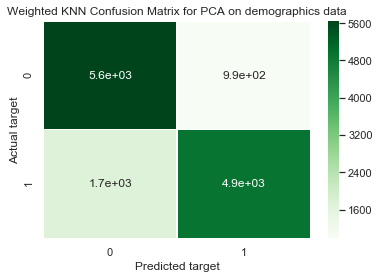

Weighted average accuracy of KNN using cross validation on PCA for demographics: -0.08 (+/- 0.31)
Root mean squared error of KNN using PCA for demographics : 0.34961983141978836


In [35]:
print(classification_report(target, demo_y.round(), target_names=['No Default', 'Default']))
confmat5 = confusion_matrix(target, demo_y.round())

#creating heatmap of confusion matrix
plt.figure(figsize = (6,4))
sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'w', 'axes.grid': False, 'axes.linewidth': 1 })
sns.heatmap(confmat5,
           cmap='Greens',
           annot=True,
           linewidths=0.5)
plt.title('Weighted KNN Confusion Matrix for PCA on demographics data')
plt.xlabel('Predicted target')
plt.ylabel('Actual target')
plt.show()

KNNw_RMSE_demo = np.sqrt(metrics.mean_squared_error(demo_y,target))
KNN_Weighted_demo = cross_val_score(knn, pred_demo, target, cv=5)
print("Weighted average accuracy of KNN using cross validation on PCA for demographics: %0.2f (+/- %0.2f)" % (KNN_Weighted_demo.mean(), KNN_Weighted_demo.std() * 2))
print("Root mean squared error of KNN using PCA for demographics : {}".format(KNNw_RMSE_demo))

#### e. Unweighted model with PCA on original attributes

In [36]:
knn1 = neighbors.KNeighborsRegressor(n_neighbors=5)
knn1.fit(pcax, y)
y_pca = knn1.predict(pcax)
print("Accuracy score of Unweighted KNN using PCA on demographic data : {}".format(knn1.score(pcax, y)))

Accuracy score of Unweighted KNN using PCA on demographic data : 0.3977456298975286


              precision    recall  f1-score   support

  No Default       0.77      0.79      0.78      6636
     Default       0.78      0.76      0.77      6636

   micro avg       0.78      0.78      0.78     13272
   macro avg       0.78      0.78      0.78     13272
weighted avg       0.78      0.78      0.78     13272



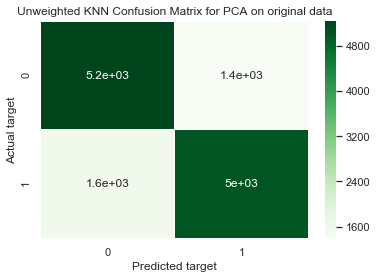

Unweighted average accuracy of KNN using PCA on original data: 0.02 (+/- 0.07)
Root mean squared error of KNN unweighted model using PCA for original data : 0.38802524727859894


In [37]:
print(classification_report(y, y_pca.round(), target_names=['No Default', 'Default']))
confmat6 = confusion_matrix(y, y_pca.round())

#creating heatmap of confusion matrix
plt.figure(figsize = (6,4))
sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'w', 'axes.grid': False, 'axes.linewidth': 1 })
sns.heatmap(confmat6,
           cmap='Greens',
           annot=True,
           linewidths=0.5)
plt.title('Unweighted KNN Confusion Matrix for PCA on original data')
plt.xlabel('Predicted target')
plt.ylabel('Actual target')
plt.show()

KNNuw_RMSE_pca = np.sqrt(metrics.mean_squared_error(y_pca,y))
KNN_Unweighted_pca = cross_val_score(knn1, pcax, y, cv=5)
print("Unweighted average accuracy of KNN using PCA on original data: %0.2f (+/- %0.2f)" % (KNN_Unweighted_pca.mean(), KNN_Unweighted_pca.std() * 2))
print("Root mean squared error of KNN unweighted model using PCA for original data : {}".format(KNNuw_RMSE_pca))

### 3. SVM Classifier model 

#### a. Using model on the original data 

In [38]:
svc = SVC()
svc.fit(X,y)
y_svc = svc.predict(X)
print("Accuracy score of SVC model on entire data : {}".format(svc.score(X,y)))

c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy score of SVC model on entire data : 0.9948764315852924


              precision    recall  f1-score   support

  No Default       1.00      0.99      0.99      6636
     Default       0.99      1.00      0.99      6636

   micro avg       0.99      0.99      0.99     13272
   macro avg       0.99      0.99      0.99     13272
weighted avg       0.99      0.99      0.99     13272



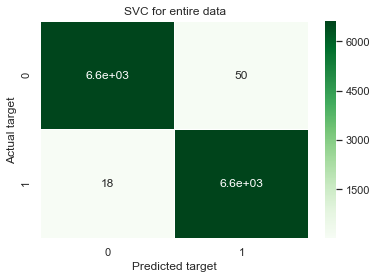

c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", F

Average accuracy of SVC using cross validation on all data: 0.52 (+/- 0.01)
Root mean squared error of SVC model using original data : 0.07157910599265442


In [39]:
print(classification_report(target, y_svc.round(), target_names=['No Default', 'Default']))
confmat7 = confusion_matrix(target, y_svc.round())

#creating heatmap of confusion matrix
plt.figure(figsize = (6,4))
sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'w', 'axes.grid': False, 'axes.linewidth': 1 })
sns.heatmap(confmat7,
           cmap='Greens',
           annot=True,
           linewidths=0.5)
plt.title('SVC for entire data')
plt.xlabel('Predicted target')
plt.ylabel('Actual target')
plt.show()

SVC_RMSE_data = np.sqrt(metrics.mean_squared_error(y_svc,y))
SVC_data = cross_val_score(svc, X, y, cv=5)
print("Average accuracy of SVC using cross validation on all data: %0.2f (+/- %0.2f)" % (SVC_data.mean(), SVC_data.std() * 2))
print("Root mean squared error of SVC model using original data : {}".format(SVC_RMSE_data))

#### b. Using model with PCA on original attributes

In [40]:
svc.fit(pcax, y)
y_svc_pca = svc.predict(pcax)
print("Accuracy score of SVC model with PCA on original data : {}".format(svc.score(pcax, y)))

Accuracy score of SVC model with PCA on original data : 0.7209162145871006


              precision    recall  f1-score   support

  No Default       0.68      0.85      0.75      6636
     Default       0.80      0.60      0.68      6636

   micro avg       0.72      0.72      0.72     13272
   macro avg       0.74      0.72      0.72     13272
weighted avg       0.74      0.72      0.72     13272



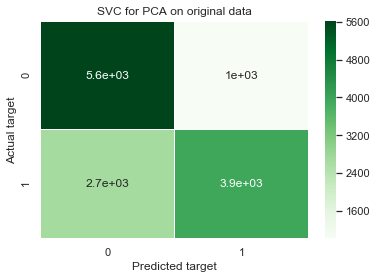

c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", F

Average accuracy of SVC using cross validation with PCA on original data: 0.70 (+/- 0.02)
Root mean squared error of SVC model using PCA on original data : 0.5282838114242185


In [41]:
print(classification_report(y, y_svc_pca.round(), target_names=['No Default', 'Default']))
confmat8 = confusion_matrix(y, y_svc_pca.round())

#creating heatmap of confusion matrix
plt.figure(figsize = (6,4))
sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'w', 'axes.grid': False, 'axes.linewidth': 1 })
sns.heatmap(confmat8,
           cmap='Greens',
           annot=True,
           linewidths=0.5)
plt.title('SVC for PCA on original data')
plt.xlabel('Predicted target')
plt.ylabel('Actual target')
plt.show()

SVC_RMSE_pca = np.sqrt(metrics.mean_squared_error(y_svc_pca,target))
SVC_pca = cross_val_score(svc,pcax, y, cv=5)
print("Average accuracy of SVC using cross validation with PCA on original data: %0.2f (+/- %0.2f)" % (SVC_pca.mean(), SVC_pca.std() * 2))
print("Root mean squared error of SVC model using PCA on original data : {}".format(SVC_RMSE_pca))

### 4. Decision Trees

#### a. Using model with Original attributes

In [42]:
paramd = {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 490}
dtc = DecisionTreeClassifier(**paramd)
dtc.fit(X, y)
y_dtree_data = dtc.predict(X)
print("Accuracy score of Decision Tree model on original data : {}".format(dtc.score(X, y)))

Accuracy score of Decision Tree model on original data : 0.7138336347197106


              precision    recall  f1-score   support

  No Default       0.70      0.76      0.73      6636
     Default       0.74      0.67      0.70      6636

   micro avg       0.71      0.71      0.71     13272
   macro avg       0.72      0.71      0.71     13272
weighted avg       0.72      0.71      0.71     13272



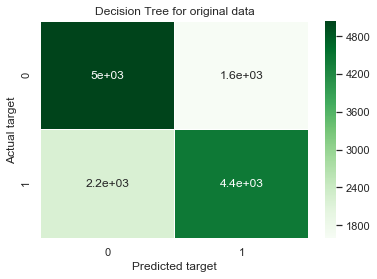

Average accuracy of Decision Tree using cross validation with original data: 0.69 (+/- 0.02)
Root mean squared error of decision tree model using original data : 0.5349451983897877


In [43]:
print(classification_report(y, y_dtree_data.round(), target_names=['No Default', 'Default']))
confmat9 = confusion_matrix(y, y_dtree_data.round())

#creating heatmap of confusion matrix
plt.figure(figsize = (6,4))
sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'w', 'axes.grid': False, 'axes.linewidth': 1 })
sns.heatmap(confmat9,
           cmap='Greens',
           annot=True,
           linewidths=0.5)
plt.title('Decision Tree for original data')
plt.xlabel('Predicted target')
plt.ylabel('Actual target')
plt.show()

DecisionTree_RMSE_data = np.sqrt(metrics.mean_squared_error(y_dtree_data,y))
DecisionTree_data = cross_val_score(dtc, X, y, cv=5)
print("Average accuracy of Decision Tree using cross validation with original data: %0.2f (+/- %0.2f)" % (DecisionTree_data.mean(), DecisionTree_data.std() * 2))
print("Root mean squared error of decision tree model using original data : {}".format(DecisionTree_RMSE_data))

#### b. Using model with PCA on original data

In [44]:
paramd = {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 490}
dtc = DecisionTreeClassifier(**paramd)
dtc.fit(pcax, y)
y_dtree_pca = dtc.predict(pcax)
print("Accuracy score of Decision Tree model with PCA on original data : {}".format(dtc.score(pcax, y)))

Accuracy score of Decision Tree model with PCA on original data : 0.7088607594936709


              precision    recall  f1-score   support

  No Default       0.67      0.82      0.74      6636
     Default       0.77      0.59      0.67      6636

   micro avg       0.71      0.71      0.71     13272
   macro avg       0.72      0.71      0.70     13272
weighted avg       0.72      0.71      0.70     13272



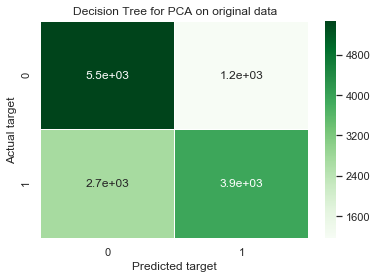

Average accuracy of Decision Tree using cross validation with PCA on original data: 0.68 (+/- 0.01)
Root mean squared error of decision tree model using PCA on original data : 0.5395732021758763


In [45]:
print(classification_report(y, y_dtree_pca.round(), target_names=['No Default', 'Default']))
confmat10 = confusion_matrix(y, y_dtree_pca.round())

#creating heatmap of confusion matrix
plt.figure(figsize = (6,4))
sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'w', 'axes.grid': False, 'axes.linewidth': 1 })
sns.heatmap(confmat10,
           cmap='Greens',
           annot=True,
           linewidths=0.5)
plt.title('Decision Tree for PCA on original data')
plt.xlabel('Predicted target')
plt.ylabel('Actual target')
plt.show()

DecisionTree_RMSE_pca = np.sqrt(metrics.mean_squared_error(y_dtree_pca,y))
DecisionTree_pca = cross_val_score(dtc, pcax, y, cv=5)
print("Average accuracy of Decision Tree using cross validation with PCA on original data: %0.2f (+/- %0.2f)" % (DecisionTree_pca.mean(), DecisionTree_pca.std() * 2))
print("Root mean squared error of decision tree model using PCA on original data : {}".format(DecisionTree_RMSE_pca))

### 5. Random Forest Classifer model

#### a. Using model with PCA on original attributes

In [46]:
params1 = {'n_estimators': 100,
          'bootstrap':False,
          'max_depth': 100,
          'max_features':'sqrt',
           'min_samples_leaf': 2, 
           'min_samples_split': 10}
rfc1 = ensemble.RandomForestClassifier(**params1)
rfc1.fit(pcax, y)
y_random = rfc1.predict(pcax)
print("Accuracy score of Random Forest model with PCA on original data : {}".format(rfc1.score(pcax, y)))

Accuracy score of Random Forest model with PCA on original data : 0.9981163351416515


              precision    recall  f1-score   support

  No Default       1.00      1.00      1.00      6636
     Default       1.00      1.00      1.00      6636

   micro avg       1.00      1.00      1.00     13272
   macro avg       1.00      1.00      1.00     13272
weighted avg       1.00      1.00      1.00     13272



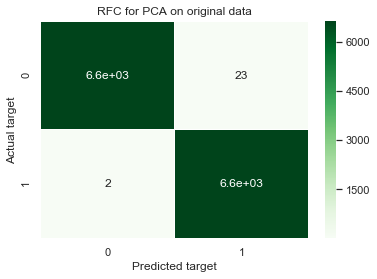

Average accuracy of random forest using cross validation with PCA on original data: 0.70 (+/- 0.02)
Root mean squared error of random forest model using PCA on original data: 0.04340120802867591


In [47]:
print(classification_report(y, y_random.round(), target_names=['No Default', 'Default']))
confmat11 = confusion_matrix(y, y_random.round())

#creating heatmap of confusion matrix
plt.figure(figsize = (6,4))
sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'w', 'axes.grid': False, 'axes.linewidth': 1 })
sns.heatmap(confmat11,
           cmap='Greens',
           annot=True,
           linewidths=0.5)
plt.title('RFC for PCA on original data')
plt.xlabel('Predicted target')
plt.ylabel('Actual target')
plt.show()

RandomForest_RMSE_pca = np.sqrt(metrics.mean_squared_error(y_random,y))
RandomForest_pca = cross_val_score(rfc1, pcax, y, cv=5)
print("Average accuracy of random forest using cross validation with PCA on original data: %0.2f (+/- %0.2f)" % (RandomForest_pca.mean(), RandomForest_pca.std() * 2))
print("Root mean squared error of random forest model using PCA on original data: {}".format(RandomForest_RMSE_pca))

#### b. Using model on Original data

In [48]:
params = {'n_estimators': 100,
          'bootstrap':False,
          'max_depth': 100,
          'max_features':'sqrt',
           'min_samples_leaf': 2, 
           'min_samples_split': 10}
rfc = ensemble.RandomForestClassifier(**params)
rfc.fit(X, y)
y_random_data = rfc.predict(X)
print("Accuracy score of Random Forest model on original data : {}".format(rfc.score(X,y)))

Accuracy score of Random Forest model on original data : 0.9875678119349005


              precision    recall  f1-score   support

  No Default       1.00      0.98      0.99      6636
     Default       0.98      1.00      0.99      6636

   micro avg       0.99      0.99      0.99     13272
   macro avg       0.99      0.99      0.99     13272
weighted avg       0.99      0.99      0.99     13272



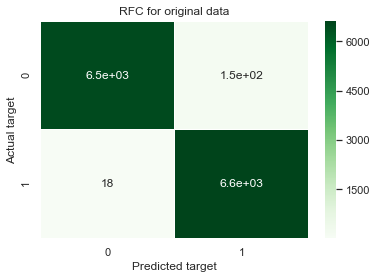

Average accuracy of random forest using cross validation with original data: 0.70 (+/- 0.02)
Root mean squared error of Random Forest model using original data : 0.11149972226467408


In [49]:
print(classification_report(y, y_random_data.round(), target_names=['No Default', 'Default']))
confmat12 = confusion_matrix(y, y_random_data.round())

#creating heatmap of confusion matrix
plt.figure(figsize = (6,4))
sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'w', 'axes.grid': False, 'axes.linewidth': 1 })
sns.heatmap(confmat12,
           cmap='Greens',
           annot=True,
           linewidths=0.5)
plt.title('RFC for original data')
plt.xlabel('Predicted target')
plt.ylabel('Actual target')
plt.show()

RandomForest_RMSE_data = np.sqrt(metrics.mean_squared_error(y_random_data,y))
RandomForest_data = cross_val_score(rfc, X, y, cv=5)
print("Average accuracy of random forest using cross validation with original data: %0.2f (+/- %0.2f)" % (RandomForest_data.mean(), RandomForest_data.std() * 2))
print("Root mean squared error of Random Forest model using original data : {}".format(RandomForest_RMSE_data))

#### Important Features for Random Forest

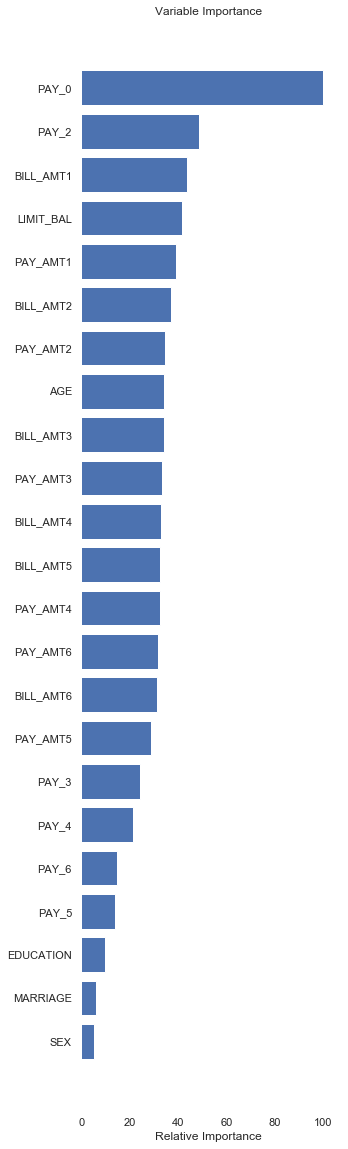

In [50]:
plt.figure(figsize=(10, 20))
feature_importance = rfc.feature_importances_

# Make importances relative to maxdata
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
#demor = pd.DataFrame(pcax,columns = X.columns)
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### 6. Gradient Boost Modelling

#### a. Using model on Original data

In [51]:
# We'll make 1000 iterations, use 3-deep trees, and set our loss function.
params = {'n_estimators': 1000,
          'learning_rate':0.2,
          'max_depth': 8,
          'subsample':0.8,
          'loss': 'deviance',
          'min_samples_leaf': 2}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X, y)
predict = clf.predict(X)
# Accuracy tables.
table = pd.crosstab(y, predict, margins=True)

tI_errors = table.loc[0.0,1.0] / table.loc['All','All']
tII_errors = table.loc[1.0,0.0] / table.loc['All','All']
score = clf.score(X, y)

print((
    'Accuracy score for gradient boost on original data: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    
).format(score, tI_errors, tII_errors))

Accuracy score for gradient boost on original data: 0.9994725738396625
Percent Type I errors: 0.0003013863773357444
Percent Type II errors: 0.0002260397830018083




              precision    recall  f1-score   support

  No Default       1.00      1.00      1.00      6636
     Default       1.00      1.00      1.00      6636

   micro avg       1.00      1.00      1.00     13272
   macro avg       1.00      1.00      1.00     13272
weighted avg       1.00      1.00      1.00     13272



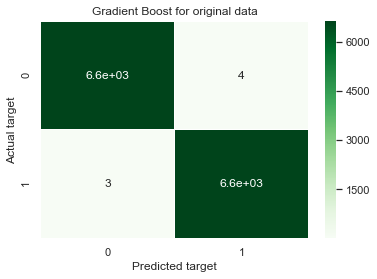

Average accuracy of Gradient Boosting using cross validation on original data: 0.68 (+/- 0.02)
Root mean squared error of Gradient Boosting model using Original data : 0.022965760608731265


In [52]:
print(classification_report(y, predict.round(), target_names=['No Default', 'Default']))
confmat13 = confusion_matrix(y, predict.round())

#creating heatmap of confusion matrix
plt.figure(figsize = (6,4))
sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'w', 'axes.grid': False, 'axes.linewidth': 1 })
sns.heatmap(confmat13,
           cmap='Greens',
           annot=True,
           linewidths=0.5)
plt.title('Gradient Boost for original data')
plt.xlabel('Predicted target')
plt.ylabel('Actual target')
plt.show()

GB_RMSE_data = np.sqrt(metrics.mean_squared_error(predict,y))
GB_data = cross_val_score(clf, X, y, cv=5)
print ("Average accuracy of Gradient Boosting using cross validation on original data: %0.2f (+/- %0.2f)" % (GB_data.mean(), GB_data.std() * 2))
print("Root mean squared error of Gradient Boosting model using Original data : {}".format(GB_RMSE_data))

#### Important features of Gradient Boost

#### b. Using model with PCA on original attributes

In [53]:
# We'll make 1000 iterations, use 3-deep trees, and set our loss function.
params = {'n_estimators': 1000,
          'learning_rate':0.2,
          'max_depth': 8,
          'subsample':0.8,
          'loss': 'deviance',
          'min_samples_leaf': 2}

# Initialize and fit the model.
clf1 = ensemble.GradientBoostingClassifier(**params)
clf1.fit(pcax, y)
predict = clf1.predict(pcax)


# Accuracy tables.
table = pd.crosstab(target, predict, margins=True)
tI_errors = table.loc[0.0,1.0] / table.loc['All','All']
tII_errors = table.loc[1.0,0.0] / table.loc['All','All']
score = clf1.score(pcax, y)

print((
    'Accuracy score with Gradient Boost using PCA on original data: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    
).format(score, tI_errors, tII_errors))

Accuracy score with Gradient Boost using PCA on original data: 0.9994725738396625
Percent Type I errors: 0.0003013863773357444
Percent Type II errors: 0.0002260397830018083




              precision    recall  f1-score   support

  No Default       1.00      1.00      1.00      6636
     Default       1.00      1.00      1.00      6636

   micro avg       1.00      1.00      1.00     13272
   macro avg       1.00      1.00      1.00     13272
weighted avg       1.00      1.00      1.00     13272



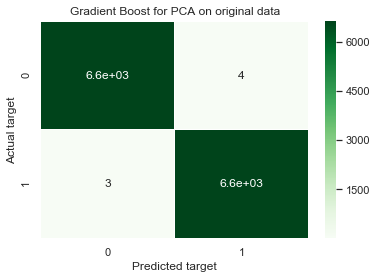

Average accuracy of Gradient Boosting using cross validation for PCA on original data: 0.69 (+/- 0.02)
Root mean squared error of Gradient Boosting model using PCA on original data : 0.022965760608731265


In [54]:
print(classification_report(y, predict.round(), target_names=['No Default', 'Default']))
confmat14 = confusion_matrix(y, predict.round())

#creating heatmap of confusion matrix
plt.figure(figsize = (6,4))
sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'w', 'axes.grid': False, 'axes.linewidth': 1 })
sns.heatmap(confmat14,
           cmap='Greens',
           annot=True,
           linewidths=0.5)
plt.title('Gradient Boost for PCA on original data')
plt.xlabel('Predicted target')
plt.ylabel('Actual target')
plt.show()

GB_RMSE_pca = np.sqrt(metrics.mean_squared_error(predict,y))
GB_pca = cross_val_score(clf1, pcax, y, cv=5)
print ("Average accuracy of Gradient Boosting using cross validation for PCA on original data: %0.2f (+/- %0.2f)" % (GB_pca.mean(), GB_pca.std() * 2))
print("Root mean squared error of Gradient Boosting model using PCA on original data : {}".format(GB_RMSE_pca))

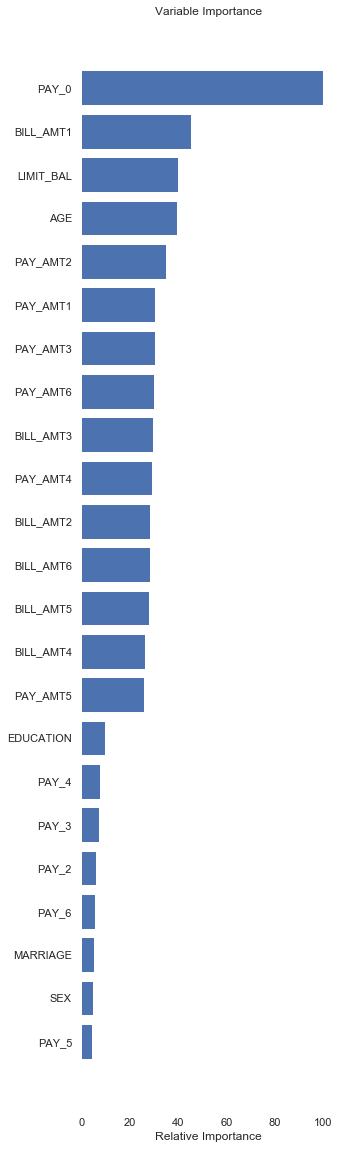

In [55]:
plt.figure(figsize=(10, 20))
feature_importance1 = clf.feature_importances_

# Make importances relative to maxdata
feature_importance1 = 100.0 * (feature_importance1 / feature_importance1.max())
sorted_idx1 = np.argsort(feature_importance1)
pos1 = np.arange(sorted_idx1.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos1, feature_importance1[sorted_idx1], align='center')
plt.yticks(pos1, X.columns[sorted_idx1])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

#### Feature engineering.

In [56]:
TOTAL = 6
data['BILL_AVG'] = (data['BILL_AMT1'] + data['BILL_AMT2'] + data['BILL_AMT3'] + 
                    data['BILL_AMT4'] + data['BILL_AMT5'] + data['BILL_AMT6'])/TOTAL
data['PAY_AMT_AVG'] = (data['PAY_AMT1'] + data['PAY_AMT2'] + data['PAY_AMT3'] + 
                    data['PAY_AMT4'] + data['PAY_AMT5'] + data['PAY_AMT6'])/TOTAL

####  Weighted KNN model using PCA on  feature engineering 

In [57]:
important = data[['MARRIAGE','SEX','LIMIT_BAL','BILL_AVG','PAY_AMT_AVG','PAY_6','PAY_5','PAY_0']]
y_pred = data.Default

pca1 = PCA(n_components = 2)
pca_imp = pca1.fit_transform(important) 
knn.fit(pca_imp, y_pred)
y_features = knn.predict(pca_imp)
print("Accuracy of Weighted KNN model with PCA on feature engineering : {}".format(knn.score(pca_imp, y_pred)))

Accuracy of Weighted KNN model with PCA on feature engineering : 0.9825507333735182


              precision    recall  f1-score   support

  No Default       0.99      0.99      0.99      6636
     Default       0.99      0.99      0.99      6636

   micro avg       0.99      0.99      0.99     13272
   macro avg       0.99      0.99      0.99     13272
weighted avg       0.99      0.99      0.99     13272



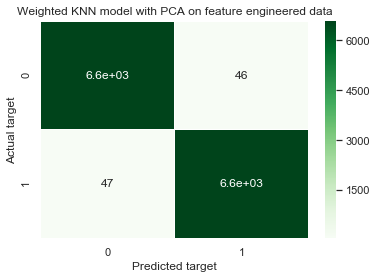

Average accuracy of Weighted KNN using cross validation on PCA with features: -0.03 (+/- 0.13)
Root mean squared error of Weighted KNN model using feature engineering : 0.06604783612367973


In [58]:
print(classification_report(y_pred, y_features.round(), target_names=['No Default', 'Default']))
confmat15 = confusion_matrix(y_pred, y_features.round())

#creating heatmap of confusion matrix
plt.figure(figsize = (6,4))
sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'w', 'axes.grid': False, 'axes.linewidth': 1 })
sns.heatmap(confmat15,
           cmap='Greens',
           annot=True,
           linewidths=0.5)
plt.title('Weighted KNN model with PCA on feature engineered data')
plt.xlabel('Predicted target')
plt.ylabel('Actual target')
plt.show()

KNNw_RMSE_features = np.sqrt(metrics.mean_squared_error(y_features,y_pred))
KNN_Weighted_Features = cross_val_score(knn, pca_imp, y_pred, cv=5)
print ("Average accuracy of Weighted KNN using cross validation on PCA with features: %0.2f (+/- %0.2f)" % (KNN_Weighted_Features.mean(), KNN_Weighted_Features.std() * 2))
print("Root mean squared error of Weighted KNN model using feature engineering : {}".format(KNNw_RMSE_features))

####  Naive Bayes model using feature engineering and PCA with test and training data

In [59]:
bnb1 = BernoulliNB()
bnb1.fit(pca_imp, y_pred)
# Classify, storing the result in a new variable.
y_test = bnb1.predict(pca_imp)
print("Accuracy score using Navie Bayes with PCA on feature engineering : {}".format(bnb1.score(pca_imp, y_pred)))

Accuracy score using Navie Bayes with PCA on feature engineering : 0.5870253164556962


              precision    recall  f1-score   support

  No Default       0.61      0.50      0.55      6636
     Default       0.57      0.67      0.62      6636

   micro avg       0.59      0.59      0.59     13272
   macro avg       0.59      0.59      0.58     13272
weighted avg       0.59      0.59      0.58     13272



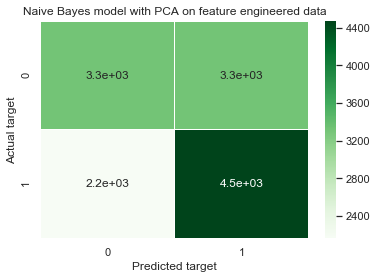

Average accuracy of Naive Bayes using cross validation with PCA on feature engineering: -0.03 (+/- 0.13)
Root mean squared error of Naive Bayes model using PCA on feature engineering : 0.6426310633203968


In [60]:
print(classification_report(y_pred, y_test.round(), target_names=['No Default', 'Default']))
confmat16 = confusion_matrix(y_pred, y_test.round())

#creating heatmap of confusion matrix
plt.figure(figsize = (6,4))
sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'w', 'axes.grid': False, 'axes.linewidth': 1 })
sns.heatmap(confmat16,
           cmap='Greens',
           annot=True,
           linewidths=0.5)
plt.title('Naive Bayes model with PCA on feature engineered data')
plt.xlabel('Predicted target')
plt.ylabel('Actual target')
plt.show()

Naive_Bayes_RMSE_features = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
Naive_Bayes_Features = cross_val_score(knn, pca_imp, y_pred, cv=5)
print ("Average accuracy of Naive Bayes using cross validation with PCA on feature engineering: %0.2f (+/- %0.2f)" % (Naive_Bayes_Features.mean(), Naive_Bayes_Features.std() * 2))
print("Root mean squared error of Naive Bayes model using PCA on feature engineering : {}".format(Naive_Bayes_RMSE_features))

In [61]:
rmse = pd.DataFrame (index = ["NaiveBayes_RMSE_data","KNNw_RMSE_data","KNNw_RMSE_pay_ind","KNNw_RMSE_pay_amt",
                             "KNNw_RMSE_demo","KNNuw_RMSE_pca","SVC_RMSE_data","SVC_RMSE_pca","DecisionTree_RMSE_data",
                             "DecisionTree_RMSE_pca","RandomForest_RMSE_pca","RandomForest_RMSE_data","GB_RMSE_data",
                             "GB_RMSE_pca","KNNw_RMSE_features","Naive_Bayes_RMSE_features"])

In [62]:
rmse["RMSE"] = [NaiveBayes_RMSE_data,KNNw_RMSE_data,KNNw_RMSE_pay_ind,KNNw_RMSE_pay_amt,
               KNNw_RMSE_demo,KNNuw_RMSE_pca,SVC_RMSE_data,SVC_RMSE_pca,DecisionTree_RMSE_data,
               DecisionTree_RMSE_pca,RandomForest_RMSE_pca,RandomForest_RMSE_data,GB_RMSE_data,
               GB_RMSE_pca,KNNw_RMSE_features,Naive_Bayes_RMSE_features]
rmse.sort_values("RMSE",ascending=True)

,RMSE
GB_RMSE_data,0.022966
GB_RMSE_pca,0.022966
RandomForest_RMSE_pca,0.043401
KNNw_RMSE_features,0.066048
SVC_RMSE_data,0.071579
RandomForest_RMSE_data,0.111500
KNNw_RMSE_pay_amt,0.146593
KNNw_RMSE_demo,0.349620
KNNuw_RMSE_pca,0.388025
KNNw_RMSE_pay_ind,0.471973


In [63]:
score = pd.DataFrame (index = ["NaiveBayes_data_train","KNN_Weighted_data_train","KNN_Weighted_pay_ind",
                              "KNN_Weighted_pay_amt","KNN_Weighted_demo","KNN_Unweighted_pca","SVC_data",
                              "SVC_pca","DecisionTree_data","DecisionTree_pca","RandomForest_pca","RandomForest_data",
                              "GB_data","GB_pca","KNN_Weighted_Features", "Naive_Bayes_Features"])

In [64]:
score['Score'] = [NaiveBayes_data_train.mean(),KNN_Weighted_data_train.mean(),KNN_Weighted_pay_ind.mean(),                  
                  KNN_Weighted_pay_amt.mean(),KNN_Weighted_demo.mean(),KNN_Unweighted_pca.mean(),SVC_data.mean(),
                  SVC_pca.mean(),DecisionTree_data.mean(),DecisionTree_pca.mean(),RandomForest_pca.mean(),RandomForest_data.mean(),
                  GB_data.mean(),GB_pca.mean(),KNN_Weighted_Features.mean(), Naive_Bayes_Features.mean()]
score.sort_values("Score",ascending=False)

,Score
SVC_pca,0.704793
RandomForest_data,0.695753
RandomForest_pca,0.695224
DecisionTree_data,0.693267
GB_pca,0.685053
GB_data,0.683621
NaiveBayes_data_train,0.678875
DecisionTree_pca,0.678647
SVC_data,0.515220
KNN_Weighted_data_train,0.082446


## Conclusion:

I have used about 6 different classifier models for predictions of this dataset. For every model used, I have tried different techniques in order to try to make our accuracy score better while trying to decrease our error rates.<br><br>

From the above list of Root Mean Squared error and accuracy score we can say 4 out of 16 techniques yield best values. <br>
1. Random Forest model with original data - where accuracy score is 69% and mean squared error of 11%.
2. Random Forest model with PCA on original data - where accuracy score is 69% and mean squared error is 4%.
3. Gradient Boost model with original data - where accuracy score is 68% and mean squared error of 2%.
4. Gradient Boost model with PCA on original data - where accuracy score is 68% and mean squared error is 2%
<br><br>
I think I will choose Random Forest with PCA on original data as my best model. This is because of the lower root mean squared value compared to that of original data.<br>
This is the same reason I would not choose SVC model even though the score is 70%.<br>
I see that for this particular dataset, the emsemble models like Random Forest and Gradient Boost gave the best accuracy and after tuning the parameters (quite a few times), I could reduce the error rates.


## Further Analysis:

For this particular dataset, since the data was imbalanced and since I had 30000 rows, I have used random under sampling to balance the data.<br>
In the future I would try to sample more to balance data. Also, I think I would come up with more features and try to analyze the effect of the features on the different models I have used and try to continuously iterate and evaluate the models.